In [1]:
import os
import tensorflow as tf
from tensorflow import keras

C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [8]:
train_empty_dir = os.path.join('pk-train/Empty')

train_occupied_dir = os.path.join('pk-train-/Occupied')

validation_empty_dir = os.path.join('pk-val/Empty')

validation_occpied_dir = os.path.join('pk-val/Occupied')

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 40, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 38, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 19, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 17, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)              

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'pk-train/',  
        target_size=(32, 40),  
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'pk-val/', 
        target_size=(32, 40), 
        batch_size=32,
        class_mode='binary')

Found 18280 images belonging to 2 classes.
Found 7474 images belonging to 2 classes.


In [13]:
# Save the model according to the conditions
checkpoint = tf.keras.callbacks.ModelCheckpoint("XXX.h5", monitor='val_acc', verbose=1, 
                                                save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch') 
                             
early = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [14]:
history = model.fit_generator(
train_generator,
steps_per_epoch = 10,
epochs = 30,
validation_data = validation_generator,
validation_steps = 5,
callbacks = [checkpoint, early])

Epoch 1/30
 9/10 [==========================>...] - ETA: 0s - loss: 0.6768 - acc: 0.5104 
Epoch 00001: val_acc improved from -inf to 0.50000, saving model to XXX.h5
10/10 [==============================] - 9s 935ms/step - loss: 0.6752 - acc: 0.5102 - val_loss: 0.6603 - val_acc: 0.5000
Epoch 2/30
 9/10 [==========================>...] - ETA: 0s - loss: 0.6403 - acc: 0.5356
Epoch 00002: val_acc did not improve from 0.50000
10/10 [==============================] - 2s 244ms/step - loss: 0.6368 - acc: 0.5398 - val_loss: 0.6161 - val_acc: 0.5000
Epoch 3/30
 9/10 [==========================>...] - ETA: 0s - loss: 0.5905 - acc: 0.6502
Epoch 00003: val_acc improved from 0.50000 to 0.78125, saving model to XXX.h5
10/10 [==============================] - 3s 345ms/step - loss: 0.5885 - acc: 0.6687 - val_loss: 0.5584 - val_acc: 0.7812
Epoch 4/30
 9/10 [==========================>...] - ETA: 0s - loss: 0.5341 - acc: 0.8524
Epoch 00004: val_acc improved from 0.78125 to 0.88750, saving model to XXX.h5

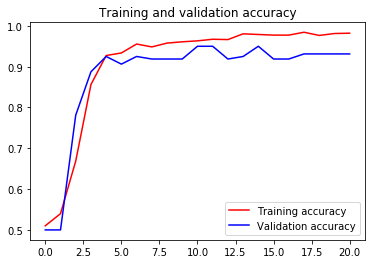

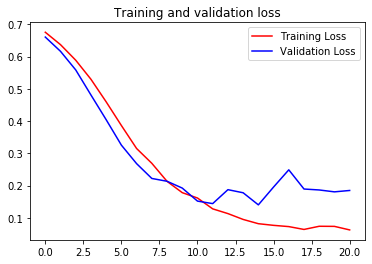

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()